In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#importing required libraries for data analysis and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
#loading the given datasets
train_dat = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')
test_dat = pd.read_csv('/content/drive/MyDrive/Dataset/test.csv')

## **Gaining Information about Datasets**

---



In [22]:
#Datatypes of various features is obtained
train_dat.info()
print('_ '*50)
test_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtyp

In [23]:
train_dat.columns #Names of various features

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
#checking for null values
train_dat.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
test_dat.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
#Dimension of the dataset
print(train_dat.shape)
print(test_dat.shape)

(891, 12)
(418, 11)


In [27]:
#Correlation between various variables
corr = train_dat.corr()

In [28]:
print(corr)

             PassengerId  Survived    Pclass  ...     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  ... -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481  ... -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000  ...  0.083081  0.018443 -0.549500
Age             0.036847 -0.077221 -0.369226  ... -0.308247 -0.189119  0.096067
SibSp          -0.057527 -0.035322  0.083081  ...  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443  ...  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  ...  0.159651  0.216225  1.000000

[7 rows x 7 columns]


In [29]:
train_dat.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [30]:
train_dat.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mineff, Mr. Ivan",male,347082,G6,S
freq,1,577,7,4,644


In [31]:
train_dat.describe(exclude=[object])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Analysing features that impact survival

---



In [32]:
#impacct of Pclass on survival
train_dat[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [33]:
train_dat[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by ='Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [34]:
#impact of gender on Survival
train_dat[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by = 'Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


# Visualizations

---



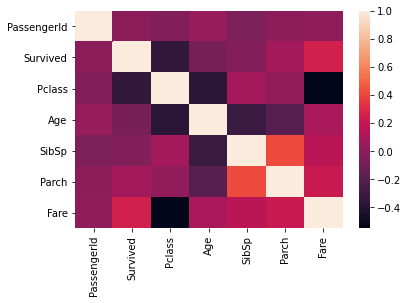

In [35]:
#visualization of correlation

sns.heatmap(corr)

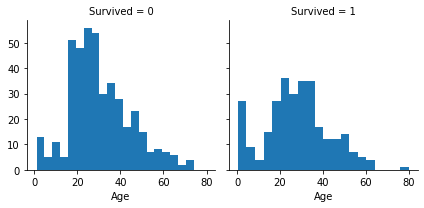

In [36]:
#histogram of Age and Survived
import seaborn as sns
a = sns.FacetGrid(train_dat,col = 'Survived')
a.map(plt.hist,'Age',bins = 20)

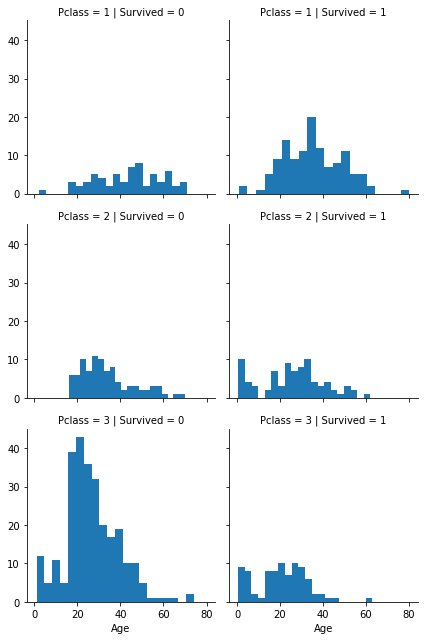

In [37]:
#histogram of survived grouped by age on each Pclass
grid = sns.FacetGrid(train_dat,col = 'Survived',row = 'Pclass')
grid.map(plt.hist,'Age',bins = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


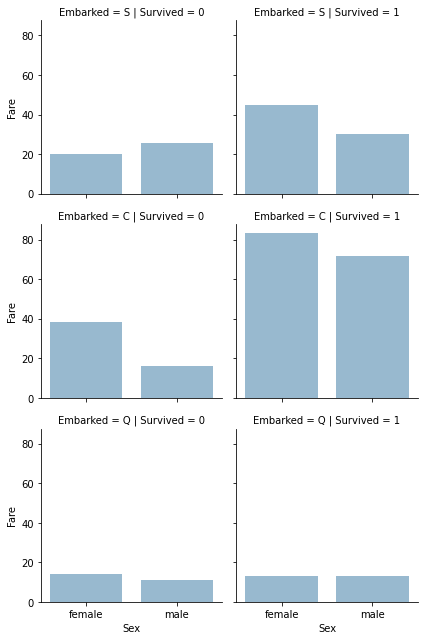

In [38]:
#Impact on embarkment on survival
grid = sns.FacetGrid(train_dat,col = 'Survived',row= 'Embarked')
grid.map(sns.barplot,'Sex','Fare',alpha = 0.5,ci = None)

# **Feature Engineering**

In [39]:
combine = [train_dat,test_dat]
print("Before", train_dat.shape, test_dat.shape, combine[0].shape, combine[1].shape)
train_dat=train_dat.drop(['Ticket','Cabin'],axis = 1)
test_dat=test_dat.drop(['Ticket','Cabin'],axis =1)
combine = [train_dat,test_dat]
"after" ,train_dat.shape,test_dat.shape,combine[0].shape,combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('after', (891, 10), (418, 9), (891, 10), (418, 9))

In [40]:
#Extracting titles from names
for dataset in combine:
   dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_dat['Title'],train_dat['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [41]:
#Replacing Titles with the apt ones
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_dat[['Title','Survived']].groupby(['Title'],as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [42]:
#mapping Titles to ordinal data
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)

In [43]:
train_dat.Title

0      1
1      3
2      2
3      3
4      1
      ..
886    5
887    2
888    2
889    1
890    1
Name: Title, Length: 891, dtype: int64

In [44]:
train_dat.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [45]:
test_dat.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [46]:
train_dat = train_dat.drop(['Name', 'PassengerId'], axis=1)
test_dat = test_dat.drop(['Name'], axis=1)
combine = [train_dat, test_dat]


In [47]:
train_dat.shape,test_dat.shape

((891, 9), (418, 9))

In [48]:
train_dat.Age = train_dat.Age.fillna(train_dat.Age.median(),axis = 0)
test_dat.Age = test_dat.Age.fillna(train_dat.Age.median(),axis = 0)


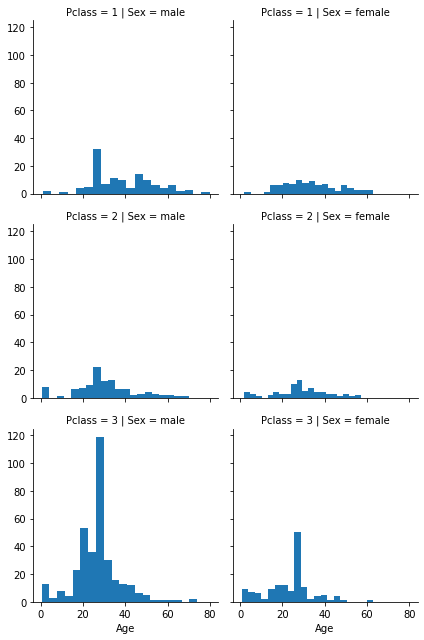

In [49]:
grid = sns.FacetGrid(train_dat,col = 'Sex',row='Pclass')
grid.map(plt.hist,'Age',bins = 20)

In [50]:
#Splitting people based on age group
train_dat["Ageband"] = pd.cut(train_dat['Age'],4)

In [51]:
#survival rate based on Age band
train_dat[['Ageband','Survived']].groupby(['Ageband'],as_index = False).mean().sort_values(by='Ageband',ascending= True)

,Ageband,Survived
0,"(0.34, 20.315]",0.458101
1,"(20.315, 40.21]",0.364769
2,"(40.21, 60.105]",0.390625
3,"(60.105, 80.0]",0.227273


In [52]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [53]:
train_dat = train_dat.drop(['Ageband'],axis = 1)


In [54]:
train_dat.shape,test_dat.shape

((891, 9), (418, 9))

In [55]:
#Combining two variables SibSp and Parch into Family size
combine = [train_dat,test_dat]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_dat[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [56]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_dat[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [57]:
#Dropping the features that donot affect our model
train_dat = train_dat.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_dat = test_dat.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_dat, test_dat]

train_dat.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,male,1.0,7.2500,S,1,0
1,1,1,female,2.0,71.2833,C,3,0
2,1,3,female,1.0,7.9250,S,2,1
3,1,1,female,2.0,53.1000,S,3,0
4,0,3,male,2.0,8.0500,S,1,1


In [58]:
freq_port = train_dat.Embarked.dropna().mode()[0]
freq_port

'S'

In [59]:
#converting Embarked to ordinal variable
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_dat[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [60]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_dat.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,male,1.0,7.2500,0,1,0
1,1,1,female,2.0,71.2833,1,3,0
2,1,3,female,1.0,7.9250,0,2,1
3,1,1,female,2.0,53.1000,0,3,0
4,0,3,male,2.0,8.0500,0,1,1


In [61]:
test_dat['Fare'].fillna(test_dat['Fare'].dropna().median(), inplace=True)
test_dat.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,male,2.0,7.8292,2,1,1
1,893,3,female,2.0,7.0000,0,3,0
2,894,2,male,3.0,9.6875,2,1,1
3,895,3,male,1.0,8.6625,0,1,1
4,896,3,female,1.0,12.2875,0,3,0


In [62]:
#Converting fare into Ordinal variable
train_dat['FareBand'] = pd.qcut(train_dat['Fare'], 4)
train_dat[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [63]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_dat = train_dat.drop(['FareBand'], axis=1)
combine = [train_dat, test_dat]
    
train_dat.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,male,1.0,0,0,1,0
1,1,1,female,2.0,3,1,3,0
2,1,3,female,1.0,1,0,2,1
3,1,1,female,2.0,3,0,3,0
4,0,3,male,2.0,1,0,1,1
5,0,3,male,1.0,1,2,1,1
6,0,1,male,3.0,3,0,1,1
7,0,3,male,0.0,2,0,4,0
8,1,3,female,1.0,1,0,3,0
9,1,2,female,0.0,2,1,3,0


In [64]:
#convertin Sex to ordinal variable
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_dat.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,0,0,1,0
1,1,1,1,2.0,3,1,3,0
2,1,3,1,1.0,1,0,2,1
3,1,1,1,2.0,3,0,3,0
4,0,3,0,2.0,1,0,1,1


In [65]:
train_dat.shape,test_dat.shape

((891, 8), (418, 8))

In [66]:
X_train = train_dat.drop("Survived", axis=1)
Y_train = train_dat["Survived"]

In [67]:
X_test  = test_dat.drop("PassengerId", axis=1).copy()

In [68]:
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [69]:
#importing all required machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [70]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.47

In [71]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.28

In [72]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.95

In [73]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.33

In [74]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.87

In [75]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.87

In [76]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.87
5,Decision Tree,86.87
1,KNN,83.95
0,Support Vector Machines,83.28
2,Logistic Regression,80.47
4,Naive Bayes,77.33


In [77]:
submission = pd.DataFrame({
        "PassengerId": test_dat["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('output.csv')